# DSCI 552 HW1 
### Name: Mengxun Li  
### USC ID: 4755004072

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings

## 1. (a) Download the Vertebral Column Data Set from

In [2]:
PATH = "../data/vertebral_column_data/column_2C.dat"
#reading data 
dat = pd.read_csv(PATH,names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"], header = 0, sep =" " )

In [3]:
dat.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB


## 1. (b) Pre-processing and Exploratory data analysis

### (i) Scatterplots

In [4]:
#replace AB & NO with 1 and 0
dat['class']=dat['class'].replace("AB",1)
dat['class'] = dat['class'].replace("NO",0)
dat

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,0
305,53.94,20.72,29.22,33.22,114.37,-0.42,0
306,61.45,22.69,46.17,38.75,125.67,-2.71,0
307,45.25,8.69,41.58,36.56,118.55,0.21,0


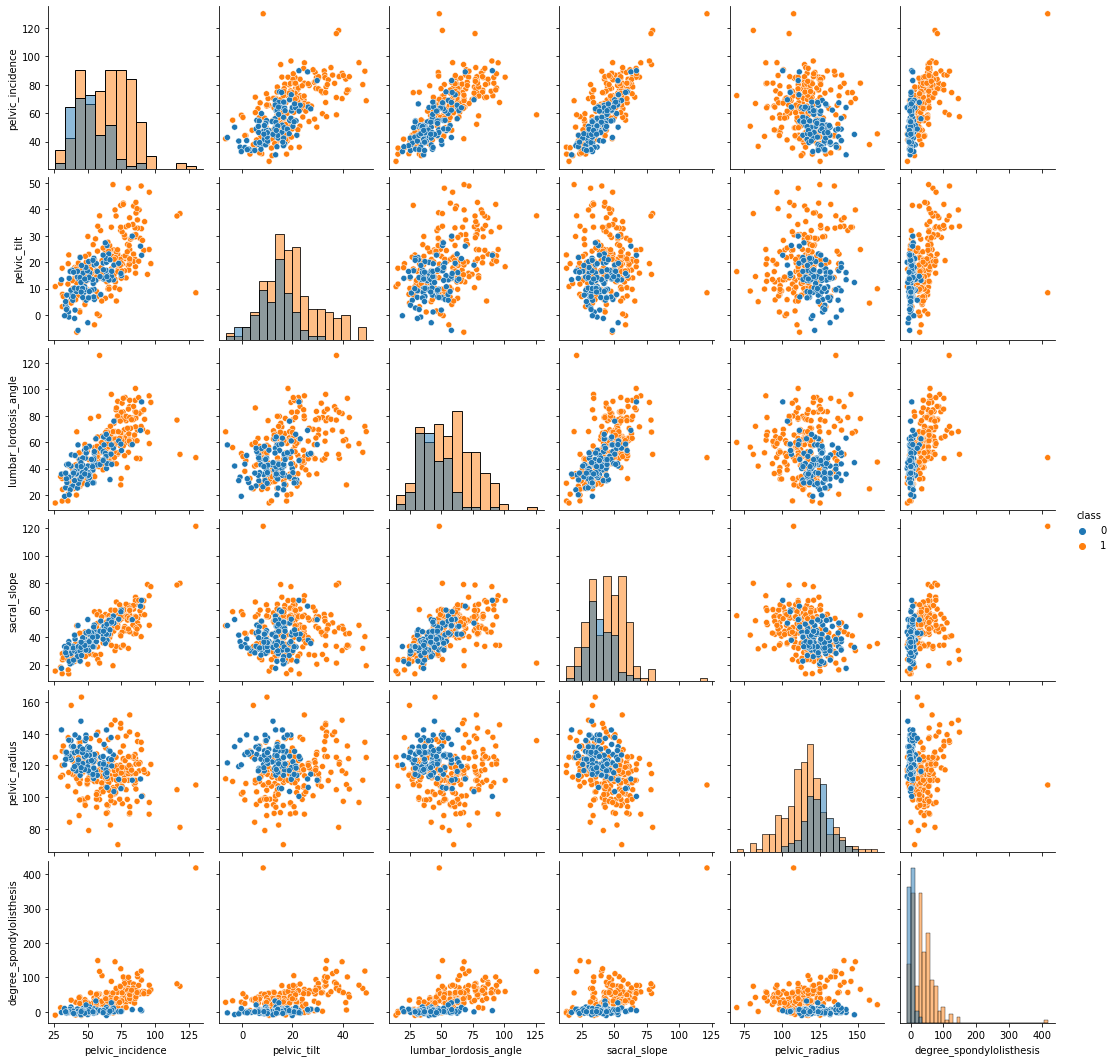

In [5]:
#scatter plot of the independent variables
pair_plot = sns.pairplot(dat, hue="class", diag_kind="hist")


### (ii) Boxplots

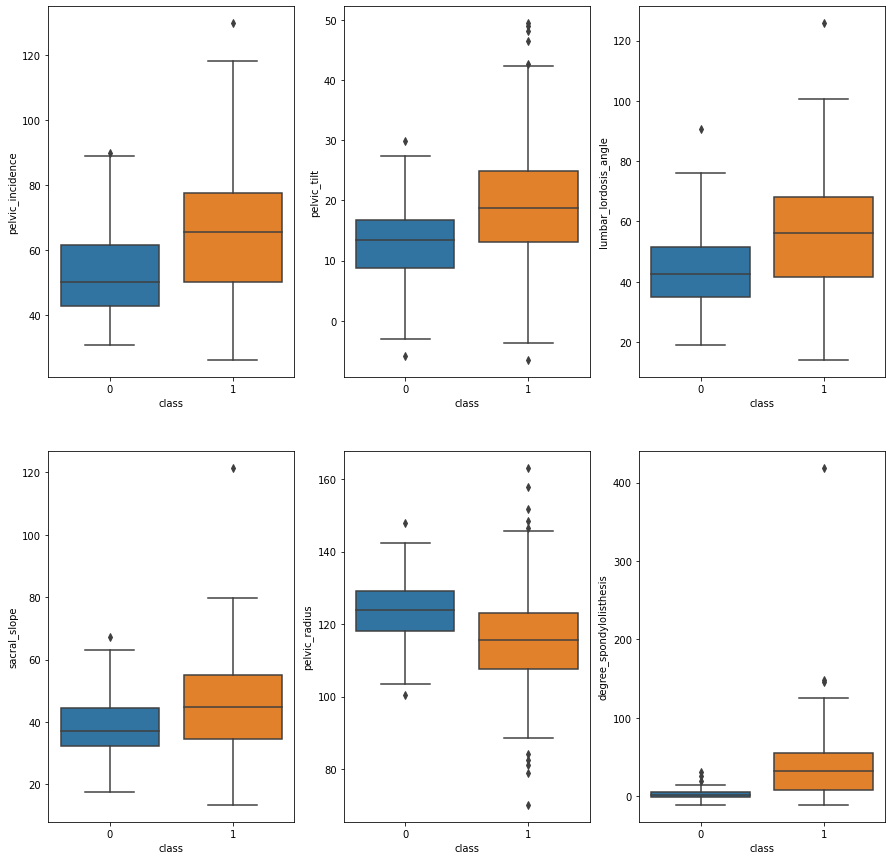

In [6]:
#boxplots of the independent variables 
names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

for i in range(6):
    sns.boxplot(x = "class",y=names[i],data=dat,ax=axes[i // 3, i % 3])



### (iii) Forming training set & testing set

In [7]:
AB = dat[dat['class'] == 1]


In [8]:
NO = dat[dat['class'] == 0]


In [9]:
#first 70 rows of class 0 and 140 rows of class 1 
training = NO.iloc[0:70].append(AB.iloc[0:140])

In [10]:
testing = NO.iloc[70:].append(AB.iloc[140:])

In [11]:
len(training)

210

In [12]:
X_train = training.drop('class',axis = 1)
y_train = training['class']
X_test = testing.drop('class',axis = 1)
y_test = testing['class']

In [13]:
#check the training set 
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
209,38.51,16.96,35.11,21.54,127.63,7.99
210,54.92,18.97,51.60,35.95,125.85,2.00
211,44.36,8.95,46.90,35.42,129.22,4.99
212,48.32,17.45,48.00,30.87,128.98,-0.91
213,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
135,88.02,39.84,81.77,48.18,116.60,56.77
136,83.40,34.31,78.42,49.09,110.47,49.67
137,72.05,24.70,79.87,47.35,107.17,56.43
138,85.10,21.07,91.73,64.03,109.06,38.03


## 1.(c) Classification using KNN on Vertebral Column Data Set

### (i) KNN  Code

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### (ii) KNN with Euclidean

In [15]:
error = []
trainerror = []
# Calculating error for K values between 1 and 40
for i in range(1,211,3 ):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

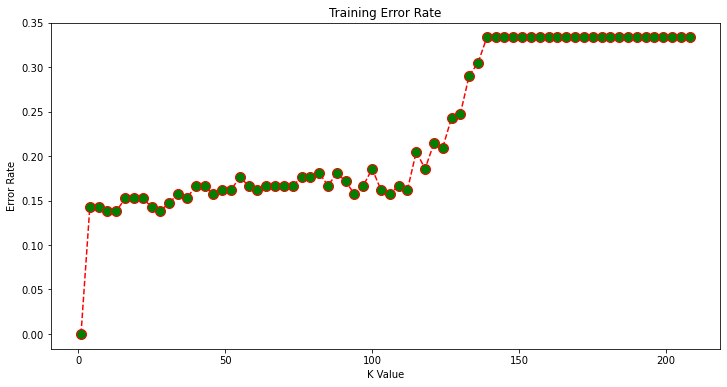

In [16]:
#training error plot 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 211,3), trainerror, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Training Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

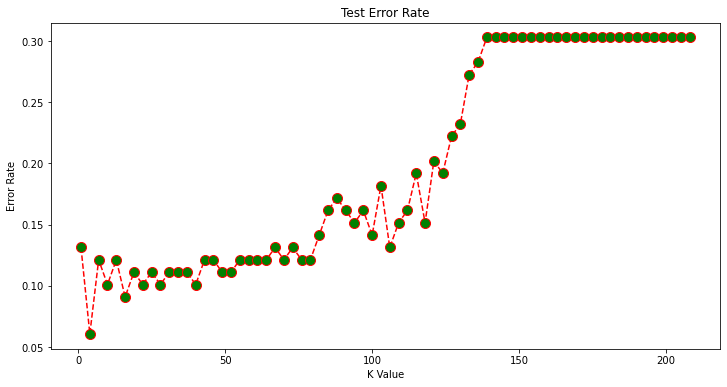

In [17]:
#test error plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 211,3), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Test Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

According to the previous plot, the best k is 4 

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        69

    accuracy                           0.94        99
   macro avg       0.95      0.91      0.93        99
weighted avg       0.94      0.94      0.94        99

tp_rate: 0.8333333333333334 tn_rate: 0.9855072463768116


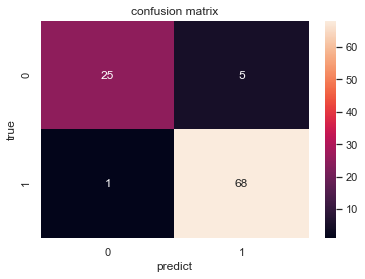

In [18]:
#K = 4 and its confusion matrix, tp rate, tn rate, precision and F1 score
classifier = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



sns.set()
f,ax=plt.subplots()
pic = confusion_matrix(y_test, y_pred)
sns.heatmap(pic,annot=True,ax=ax)

print(classification_report(y_test, y_pred))

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴


tp = pic[0, 0]
fp = pic[1, 0]
tn = pic[1, 1]
fn = pic[0, 1]
tp_rate =  tp / (tp + fn)
tn_rate = tn / (fp + tn)
print("tp_rate:",tp_rate,"tn_rate:",tn_rate)

### (iii) Plot learning curve with different traning size n


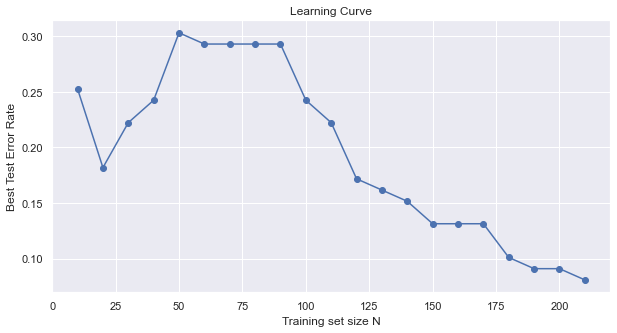

In [19]:
from sklearn.metrics import accuracy_score


best_errors = []
for i in range(10, 211, 10):
    train_set_i = (dat[dat['class']==0].iloc[0:int(i/3)]).append(dat[dat['class']==1].iloc[0:(i-int(i/3))])
    
    x_i_train = train_set_i.drop('class', axis = 1)
    y_i_train = train_set_i['class']
    errors_i = []
    for k in range(1, i, 5):
        knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean', weights='uniform')
        knn.fit(x_i_train, y_i_train)
        pred_i_test = knn.predict(X_test)
        test_i_accuracy = accuracy_score(y_test, pred_i_test)
        errors_i.append( (1-test_i_accuracy) )
    best_errors.append(min(errors_i))
plt.figure(figsize=(10, 5))
plt.scatter(range(10, 211, 10), best_errors)
plt.plot(range(10, 211, 10), best_errors)
plt.title('Learning Curve')
plt.xlabel('Training set size N')
plt.ylabel('Best Test Error Rate')
plt.show()

## 1.(d) Summarize the test errors (i.e., k = k∗) with different metrics


### (i) A - When $p = 1$, Minikowski Distance becomes Manhattan Distance

$$
Manhattan(u, v) = Minikowski(u, v, 1) = \sum_{i = 1}^{n}|u_i - v_i|
$$

best test error: 0.1111111111111111


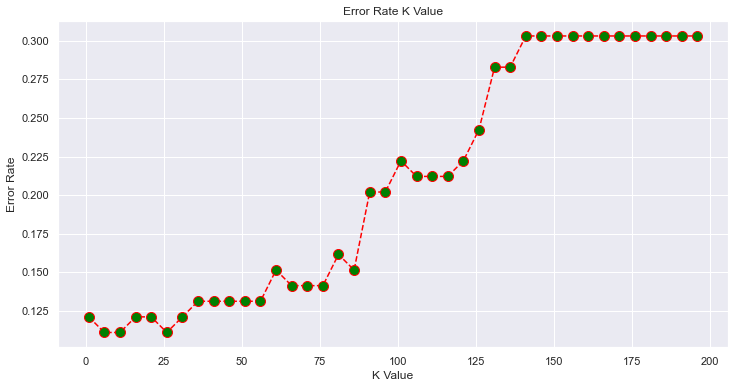

In [20]:
error = []
trainerror = []
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski', p =1 )
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("best test error:", min(error))

From the figure above, we can see that Manhattan Distance has the best performance when k is in \[6, 11, 26\].

### (i)B - Minikowski Distance with variying $p$ values of p

$$
log_{10}(p) \in \{0.1, 0.2, 0.3, ..., 1\} \Rightarrow p \in \{10^{0.1}, 10^{0.2}, ..., 10\} \\
Minikowski(u, v, p) = \left(\sum_{i = 1}^{n}|u_i - v_i|^p\right)^{\frac{1}{p}}
$$

In [21]:
ls = list(np.linspace(0.1,1,10))
p = []
for i in ls:
    p.append(10**i)

,K,p,log10(p),Error_Rate
0,6,1.258925,0.1,0.090909
1,6,1.584893,0.2,0.090909
2,6,1.995262,0.3,0.080808
3,6,2.511886,0.4,0.080808
4,6,3.162278,0.5,0.070707
5,6,3.981072,0.6,0.060606
6,6,5.011872,0.7,0.060606
7,6,6.309573,0.8,0.070707
8,6,7.943282,0.9,0.080808
9,6,10.000000,1.0,0.080808


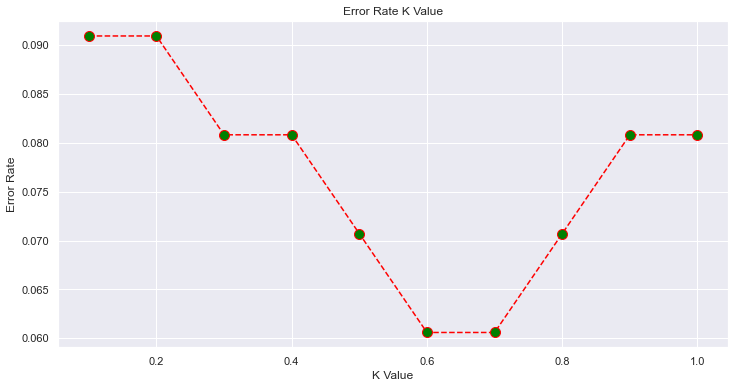

In [22]:
error = []
trainerror = []

    
#according to previous question, the best K we choose is 6, so we use 6 here and change the value of p 
for i in p:
    knn = KNeighborsClassifier(n_neighbors=6,metric='minkowski', p = i)
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0.1,1,10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')


report = {
    'K' : [6 for i in range(len(p))],
    'p' : p,
    'log10(p)' : ls,
    'Error_Rate' : error
}

report = pd.DataFrame(report)
report

### (i)C - Chebyshev Distance

When When $p \rightarrow \infty$, the maximum difference of one dimension in feature space will overwhelm the sum. Minikowski Distance becomes **Chebyshev Distance**

$$
Chebyshev(u, v) = \lim_{p \rightarrow \infty}Minikowski(u, v, p) = \max_{i \in \{1,..., n\}}|u_i - v_i|
$$

best k value: 16
best error rate: 0.08080808080808081


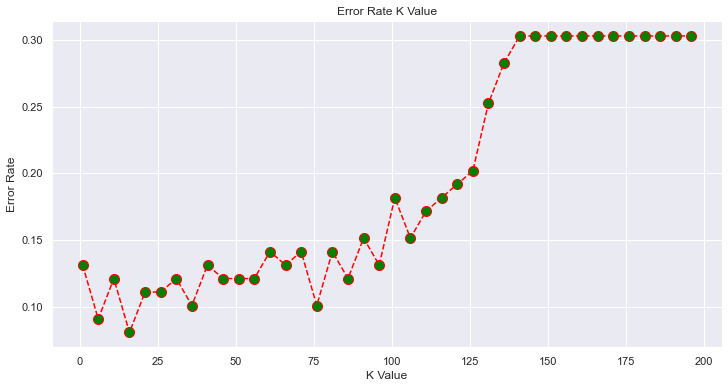

In [23]:
error = []
trainerror = []
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights = 'uniform')
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')      
print("best k value:",error.index(min(error))*5 +1)
print("best error rate:",min(error))

### 1.(d) ii Mahalanobis Distance

$$
Mahalanobis(u, v) = \sqrt{(u - v)V^{-1}(u - v)^T}
$$

where $V$ is the covariance matrix.

Implementation References:

- [Fomular Reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html)

- [numpy covariance](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)

- [Mahalanobis Distance · Chris](https://mccormickml.com/2014/07/22/mahalanobis-distance/#:~:text=The%20general%20equation%20for%20the,covariances%20between%20the%20vector%20components.&text=With%20that%20in%20mind%2C%20below,S%20is%20the%20covariance%20matrix.)

best error rate: 0.16161616161616163


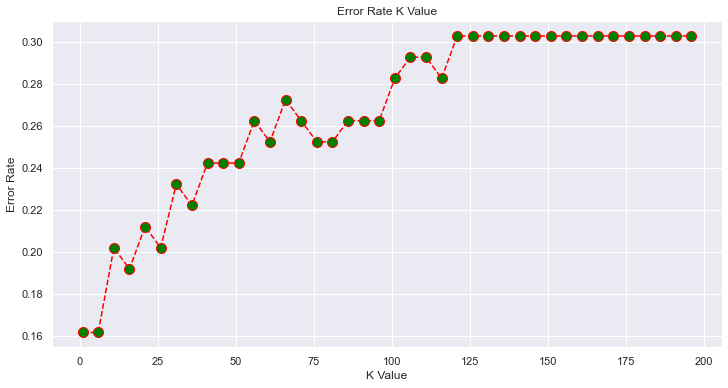

In [24]:
error = []
trainerror = []
warnings.filterwarnings("ignore")
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='mahalanobis',metric_params={'V': np.cov(X_train,rowvar= False)})
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("best error rate:",min(error))

In [25]:
report = {'Distance':['Manhattan','Chebyshev','Mahalanobis'],
          'K Value':[6,16,[1,6]],
          'Error Rate':[0.1111111111111111,0.08080808080808081,0.16161616161616163]}

          
          
pd.DataFrame(report)


,Distance,K Value,Error Rate
0,Manhattan,6,0.111111
1,Chebyshev,16,0.080808
2,Mahalanobis,"[1, 6]",0.161616


## 1.(e)  Weighted voting with Euclidean, Manhattan, and Chebyshev distances

best k value: 6
best error rate: 0.10101010101010101


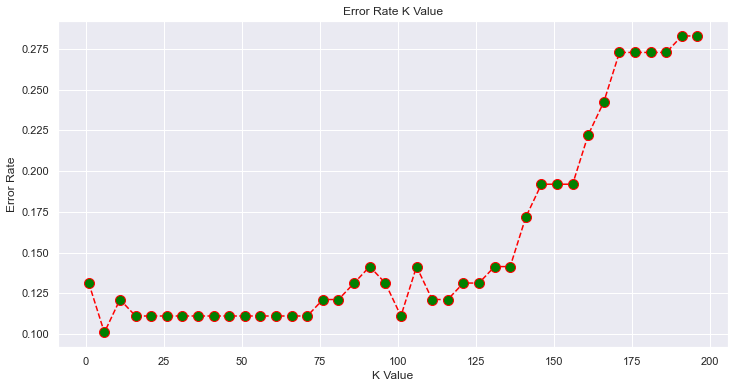

In [26]:
error = []
trainerror = []
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights = 'distance')
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')      
    
print("best k value:",error.index(min(error))*5 +1)
print("best error rate:",min(error))

best k value: 6
best error rate: 0.10101010101010101


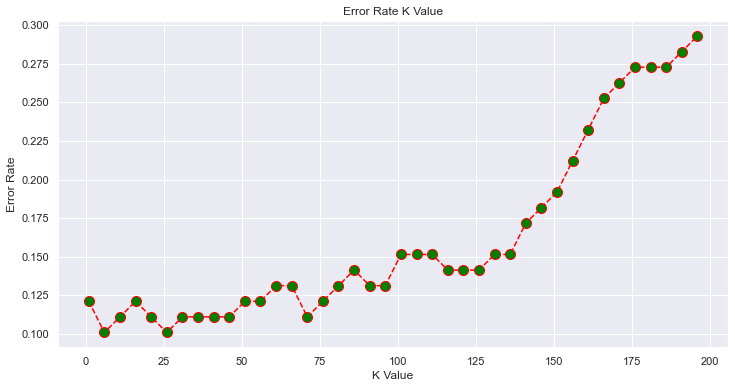

In [27]:
error = []
trainerror = []
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights = 'distance')
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')    

print("best k value:",error.index(min(error))*5 +1)
print("best error rate:",min(error))

best k value: 16
best error rate: 0.1111111111111111


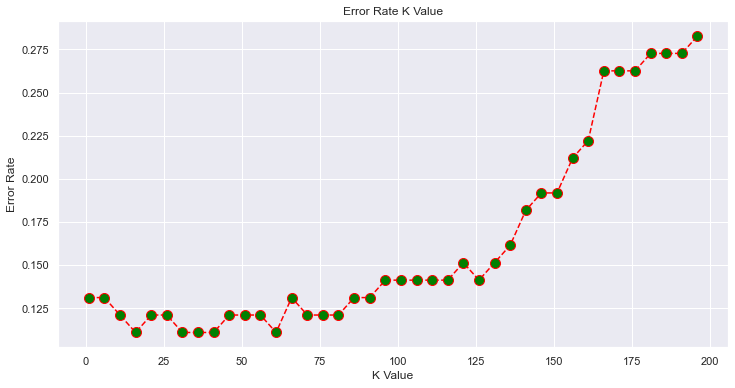

In [28]:
error = []
trainerror = []
for i in range(1, 201,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights = 'distance')
    knn.fit(X_train, y_train)
    pred_i_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    trainerror.append(np.mean(pred_i_train != y_train))
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201,5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')      
print("best k value:",error.index(min(error))*5 +1)
print("best error rate:",min(error))

In [29]:
#summary report table 
data = {'Method':['euclidean','manhattan','chebyshev'],
       'K Vaule':[6,[6,26],16],
       'Error Rate':[0.10101010101010101,0.10101010101010101,0.1111111111111111]}
pd.DataFrame(data)

,Method,K Vaule,Error Rate
0,euclidean,6,0.101010
1,manhattan,"[6, 26]",0.101010
2,chebyshev,16,0.111111


## 1.(f) The lowest training error rate you achieved in this homework

the lowest training error rate is 0 when k = 1. This is because it predicts only base on its own label so it is always correct, thus the training error is 0.